In [109]:
%matplotlib ipympl

In [110]:
import functools

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import display
from matplotlib.animation import FuncAnimation

pd.set_option('display.width', 1000)

# Set up the network
The network is set up as a 3 layer one with the layers having 784, 30 and 10 nodes. The biases and weights are set up randomly. The `zip(sizes[:-1], sizes[1:])` creates a tuple from [784, 30] and [30, 10] thus giving 2 numpy arrays of (784, 30) and (30, 10) dimensions.

In [111]:
sizes = [784, 30, 10]
num_layers = len(sizes)
rng = np.random.default_rng()
biases = [rng.standard_normal(size=(y, 1)) for y in sizes[1:]]
weights = [rng.standard_normal(size=(y, x)) for x, y in zip(sizes[:-1], sizes[1:])]

epochs = 30
mini_batch_size = 10
eta = 3.0

In [112]:
for i, bias in enumerate(biases):
    print(f"Layer {i + 1}:")
    display(pd.DataFrame(bias))

Layer 1:


,0
0,0.067281
1,1.157849
2,-1.210299
3,-1.622941
4,1.341570
5,-0.658279
6,0.676099
7,0.958473
8,0.918790
9,-0.080997


Layer 2:


,0
0,-2.214531
1,2.285933
2,-0.275196
3,-0.032407
4,-0.116754
5,0.697126
6,0.625269
7,-0.765348
8,1.927232
9,-0.472281


In [113]:
for i, weight in enumerate(weights):
    print(f"Layer {i + 1}:")
    display(pd.DataFrame(weight))

Layer 1:


,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,-0.128580,0.821482,0.510366,0.817148,0.341102,0.446691,-0.466759,0.515703,1.647394,1.002890,...,-0.047900,3.136080,1.212354,-0.642499,0.006524,-1.226093,-0.174415,0.578704,-0.208153,-0.171125
1,-0.890828,1.410155,0.028512,-0.056057,0.261117,1.494946,-0.687326,-0.251998,1.409023,1.203320,...,0.242153,0.063924,-0.476338,0.436808,0.487326,2.072997,0.820066,-1.859139,-0.560622,-0.507996
2,-0.322322,1.277847,-0.343406,0.550054,-1.834778,0.398316,0.193038,1.028673,-0.075073,-0.426040,...,0.708081,1.353938,0.603013,0.086497,-0.299054,0.346811,-0.134457,-0.406135,0.896674,1.605281
3,-0.470078,0.207997,-0.455618,-0.892992,-0.330465,0.091272,-0.226076,0.921143,2.330386,0.943024,...,-0.276344,0.035168,0.874876,1.352378,0.152091,-0.249870,-0.025469,0.530619,0.117393,1.142259
4,1.673018,-0.020872,-0.407949,1.404207,-0.447816,-0.918678,0.214022,-1.367516,-0.430317,0.000115,...,0.066099,0.265420,-2.561851,-0.530033,1.316847,-1.109288,0.742363,1.325435,0.114437,-0.917449
5,1.444647,-0.109709,-0.230053,0.967311,-1.713972,1.293194,0.149660,1.440204,2.969705,-2.510711,...,0.972210,0.485033,0.527339,-0.175719,-0.259135,1.611540,0.451790,1.319740,-1.063666,0.430424
6,0.268182,-0.884826,-1.911054,-0.049041,-1.174413,-2.036729,-0.711638,1.713876,1.113997,0.261788,...,0.550003,1.010269,1.028675,-0.588068,-0.653778,0.172283,-1.288780,-0.121100,0.487070,-0.025375
7,-0.823997,0.817385,-0.183516,-1.558486,0.549661,0.525856,-0.123138,0.565593,-1.523843,0.886103,...,1.139109,-1.453569,1.065584,0.743132,-0.383460,-0.371184,0.056040,-1.247833,-0.302692,0.645949
8,-0.020174,-0.751995,0.348513,-0.191156,-1.247187,0.750729,-0.812790,-0.040459,1.248856,-0.144349,...,1.291889,0.242759,1.156150,0.618976,-0.085964,-1.635065,1.583196,1.410270,-0.587764,0.630383
9,-0.373634,-0.985726,1.457639,1.640759,1.505699,-1.058785,0.282759,-0.744655,-0.011208,1.570673,...,-1.059488,-0.084658,-0.114672,0.079604,0.500110,0.355000,0.411023,-0.922594,0.525885,0.402531


Layer 2:


,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-1.086869,-0.945698,0.493086,1.356598,-0.109293,0.633754,-0.161501,-0.981312,-1.423354,0.503662,...,-3.174871,-1.202714,-2.218769,1.108227,1.250182,-0.142863,-0.052897,1.980780,0.173364,0.794143
1,-0.390274,0.257556,-0.836397,1.232471,-0.787079,0.549744,0.581958,0.402362,-0.043012,0.188175,...,-1.101089,0.485832,-0.413235,0.899104,0.580074,-0.772544,-0.965265,-0.813631,0.685574,-0.437480
2,-1.133059,0.491148,-1.341391,0.105195,1.552016,-0.606306,-0.408400,-0.312380,0.190566,0.787525,...,0.490355,-0.304453,-0.468252,0.087091,-1.317087,-0.425650,-0.305252,-0.434230,0.233365,-0.103124
3,-0.014968,-1.531934,-2.213589,0.590384,-0.784115,-0.298245,-0.678070,-1.048008,-0.012751,-0.241732,...,-1.066499,-2.328275,-0.734011,-0.012811,-0.919379,0.502867,-0.883179,0.217632,0.210879,0.288085
4,0.890864,-2.093990,2.349140,1.303914,-1.797576,0.776155,-0.220312,-0.008693,1.534409,-1.172669,...,-0.508374,-1.699134,-0.808069,0.836572,0.669191,-0.823215,-1.481855,0.441291,0.037632,-1.716938
5,-1.169164,1.771686,0.177179,1.327295,-0.701045,0.143635,0.473236,-0.816180,2.224880,-0.524206,...,-0.306081,0.452976,-0.672438,-0.312856,0.652874,0.156482,1.703993,-1.399467,-0.541513,0.147411
6,0.409142,-0.343714,0.295074,0.180974,-0.742732,0.340623,1.686282,-0.628730,0.142806,0.045373,...,0.513444,-1.804119,0.378316,-0.109541,0.854308,-1.015775,0.327963,0.624754,-0.102959,-0.638569
7,-0.784585,-0.521044,0.362308,-1.152281,1.062543,0.270779,0.464277,-0.099870,-0.262985,1.274146,...,-1.976114,0.254169,-0.696280,-1.223698,-0.136573,1.022164,0.065901,-1.306113,0.841606,-1.145538
8,0.407945,-0.981687,0.964459,0.281403,-0.728211,-1.618021,-0.290927,0.193371,1.021867,-0.266207,...,-0.029516,0.633875,0.484476,0.256679,2.093948,-2.703105,-0.388973,-0.443763,0.796982,0.345268
9,-1.127218,0.336613,0.893487,0.607048,0.606435,0.117138,1.204522,1.535059,0.663941,1.223764,...,0.381083,-0.404755,0.227119,1.010804,0.455990,0.193386,0.350935,0.862867,0.827995,0.602152


# Pickled Data
The Pickled data is arranged in a list of tuples, each tuple containing 2 numpy arrays, the pixels laid out in a column and the expected number laid out in an output layer format with 10 rows, all except the number row being 0 and the row corresponding to the number being 1.

In [114]:
import src.mnist_loader as mnist_loader

training_data, validation_data, test_data = mnist_loader.load_pickle_data_wrapper("../data/mnist.pkl.gz")

training_data = list(training_data)
validation_data = list(validation_data)
test_data = list(test_data)

In [115]:
pixels, expectations = zip(*training_data[:10])
pixels = np.hstack(pixels)
expectations = [np.argmax(expectation) for expectation in expectations]
display(pd.DataFrame(pixels, columns=expectations))

,5,0,4,1,9,2,1,3,1,4
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
780,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
781,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
782,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Sigmoid Function
The sigmoid function and its derivative

In [116]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))


def sigmoid_derivative(z):
    sigmoid_value = sigmoid(z)
    return sigmoid_value * (1 - sigmoid_value)

# Feed Forward
This function calculates
$$
a^{L+1}=\sigma\left(z^{L}\right)
$$
where,
$$
z=w.a+b
$$
for each layer and creates a list of all the activations and the $z$ vectors. The `activation` variable is updated in each iteration once the activation is calculated to use as the $a$ in the next iteration.

In [117]:
def feed_forward(activation):
    activations = [activation]
    z_vectors = []
    for b, w in zip(biases, weights):
        z_vector = np.dot(w, activation) + b
        z_vectors.append(z_vector)
        activation = sigmoid(z_vector)
        activations.append(activation)
    return activations, z_vectors

# Cost Function
The cost function over all $n$ training example is given by
$$
C_{n}=\frac{1}{2n}\sum_{j}^{n}\left(y_{j}-a_{j}^{L}\right)^{2}
$$

In [118]:
def cost_function(output_layer_activations, expected_values):
    return np.mean(np.square(output_layer_activations - expected_values))

# Cost Derivative
This function calculates the derivative of the cost function. The cost function over a single training example is given by
$$
C=\frac{1}{2}\sum_{j}\left(y_{j}-a_{j}^{L}\right)^{2}
$$
The derivative of this cost function w.r.t $a_{j}^{L}$ is
$$
\frac{\partial C}{\partial a_{j}^{L}}=\left(a_{j}^{L}-y_{j}\right)
$$
Thus, we can get this by subtracting the `expected_values` matrix from the activation matrix `output_layer_activations`.

In [119]:
def cost_derivative(output_layer_activations, expected_values):
    return output_layer_activations - expected_values

In [120]:
training_data_size = len(training_data)
test_data_size = len(test_data)

# Back Propagation
The back propagation algorithm starts with first calculating all the activations in the network and the associated $z$ vectors. Now, the equation of the error $\delta^L$ in the output layer $L$ is given by

$$
\delta^L_j=\frac{\partial C}{\partial a^L_j}\sigma'(z^L_j)
$$

This $\delta^L$ is calculated by `delta` which uses the `cost_derivative` and `sigmoid_derivative` functions.

Now to calculate the errors w.r.t. the biases and weights, we can use the chain rule

$$
\frac{\partial C}{\partial b^L_j}=\frac{\partial C}{\partial a^L_j}\frac{\partial a^L_j}{\partial z^L_j}\frac{\partial z^L_j}{\partial b^L_j}
$$
and
$$
\frac{\partial C}{\partial w^L_j}=\frac{\partial C}{\partial a^L_j}\frac{\partial a^L_j}{\partial z^L_j}\frac{\partial z^L_j}{\partial w^L_j}
$$

Now, $\frac{\partial a^L_j}{\partial z^L_j}$ is just $\sigma'(z^L_j)$ and while $\frac{\partial z^L_j}{\partial b^L_j}$ is $1$, $\frac{\partial z^L_j}{\partial w^L_j}$ amounts to $a^{L-1}$. `delta` can contain the errors of multiple training examples and hence they are all summed over.

After the `del_bias` and `del_weight` of the last layer is calculated, we start calculating the deltas for the previous layers one by one in the loop.

In [121]:
def back_propagation(first_layer_activations, expected_values):
    activations, z_vectors = feed_forward(first_layer_activations)

    del_bias = [np.zeros(bias.shape) for bias in biases]
    del_weight = [np.zeros(weight.shape) for weight in weights]

    # This calculates (a - y) * (d(sigmoid(z)/dz) which is dC/dz
    # In every step, the delta multiplied by the activation of the previous layer gives the partial gradient
    delta = cost_derivative(activations[-1], expected_values) * sigmoid_derivative(z_vectors[-1])
    del_bias[-1] = np.sum(delta, axis=1, keepdims=True)
    # The transpose is cause both the delta and activations a column matrix
    del_weight[-1] = np.dot(delta, activations[-2].transpose())

    for l in range(2, num_layers):
        delta = np.dot(weights[-l + 1].transpose(), delta) * sigmoid_derivative(z_vectors[-l])
        del_bias[-l] = np.sum(delta, axis=1, keepdims=True)
        del_weight[-l] = np.dot(delta, activations[-l - 1].transpose())

    return del_bias, del_weight, activations

# Gradient Descent
The gradient descent algorithm works by calculating the gradient of the cost function and then update the weights and batches in the network. The `back_propagation` method gives a vector of the $\frac{\partial C}{\partial b^l_j}$ and $\frac{\partial C}{\partial w^l_j}$. These vectors are then added up and the amount that needs to be deducted from the weights and biases are calculated using

$$
w_k\to w_k'=w_k - \frac{\eta}{m}\sum_{j}\frac{\partial C_{x_j}}{\partial w_k}
$$
$$
b_l\to b_l'=b_l - \frac{\eta}{m}\sum_{j}\frac{\partial C_{x_j}}{\partial b_l}
$$

Without using matrix based operations, the $\sum_{j}\frac{\partial C_{x_j}}{\partial w_k}$ and $\sum_{j}\frac{\partial C_{x_j}}{\partial b_l}$ is calculated by summing up all the $\frac{\partial C_{x_j}}{\partial w_k}$ and $\frac{\partial C_{x_j}}{\partial w_k}$ in the loop. Then this sum is subtracted from each wight and bias in the layers.

In the code `mini_batch` is a list of 10 elements (the batch size) each element containing a tuples of 2 `ndarrays`, 1 for the activations of the first layer and the other for the expected values. When decomposed, `first_layer_activations` is an `ndarray` of shape `(784, 1)` whereas `expected_values` is an `ndarray` of shape `(10, 1)`.

`back_propagation` return a tuple of 2 lists (3 in this notebook to generate the cost). `del_bias` contains a list of 2 `ndarrays`, 1 for each layer. The `ndarrays` are of the shape `(30, 1)` and `(10, 1)` for an output layer of 10 nodes and the preceding layer being of 30 nodes. `del_weight` also contains a list of 2 `ndarrays`, 1 for each layer. The `ndarrays` are of the shape `(30, 784)` and `(10, 30)` for an input layer of 784 nodes.

This means that `mini_del_bias` and `del_bias` are of the same shape as `biases` and `mini_del_weight` and `del_weight` are of the same shape of `weights`.

In [122]:
def gradient_descent(mini_batch):
    global biases
    global weights
    mini_del_bias = [np.zeros(bias.shape) for bias in biases]
    mini_del_weight = [np.zeros(weight.shape) for weight in weights]

    delta = []
    cost = []

    for first_layer_activations, expected_values in mini_batch:
        del_bias, del_weight, activations = back_propagation(first_layer_activations, expected_values)
        mini_del_bias = [mdb + db for mdb, db in zip(mini_del_bias, del_bias)]
        mini_del_weight = [mdw + dw for mdw, dw in zip(mini_del_weight, del_weight)]
        delta.append(del_bias[-1])
        cost.append(0.5 * np.linalg.norm(activations[-1] - expected_values) ** 2)

    biases = [bias - (eta / len(mini_batch)) * mdb for bias, mdb in zip(biases, mini_del_bias)]
    weights = [weight - (eta / len(mini_batch)) * mdw for weight, mdw in zip(weights, mini_del_weight)]

    return np.average(delta), np.average(cost)

## Matrix based calculation
Instead of calculating the total bias by subtracting the biases over the mini batch of training data in a loop, we can use matrix operations to calculate the total bias of the whole mini batch in a single go.

Zipping up the first layers and the expected values of the whole mini batch creates 2 lists, with `mini_batch_first_layer` being a tuple of 10 `ndarrays` each of shape `(784, 1)` whereas `mini_batch_expected_value` is a tuple of 10 `ndarrays` each of shape `(10, 1)`.

This time `back_propagation` is called by sending all the weights and biases. The `squeeze`, `array` and `transpose` methods create an `ndarray` for weights of the shape `(784, 10)` and an `ndarray` for biases of the shape `(10, 10)`.

In this case too, `del_bias` and `del_weight` are of the same shape as `biases` and `weights` respectively, so we can do the same operation to recalculate the biases and weights of the layers.

In [123]:
def gradient_descent_matrix(mini_batch):
    global biases
    global weights
    mini_batch_first_layer, mini_batch_expected_value = zip(*mini_batch)

    del_bias, del_weight, activations = back_propagation(
        np.squeeze(np.array(mini_batch_first_layer)).transpose(),
        np.squeeze(np.array(mini_batch_expected_value)).transpose(),
    )

    cost = (0.5 * np.linalg.norm(
        activations[-1] - np.squeeze(np.array(mini_batch_expected_value)).transpose()) ** 2) / len(mini_batch)

    biases = [bias - (eta / len(mini_batch)) * mdb for bias, mdb in zip(biases, del_bias)]
    weights = [weight - (eta / len(mini_batch)) * mdw for weight, mdw in zip(weights, del_weight)]

    return np.average(del_bias[-1]) / len(mini_batch), cost

# Accuracy
Once the training is done, the test data is passed through the network to predict the output and then the accuracy is calculated over the whole test data set.

In [124]:
def evaluate():
    test_results = [(np.argmax(feed_forward(x)[0][-1]), y) for x, y in test_data]
    return [sum(int(prediction == actual) for prediction, actual in test_results)]

# Stochastic Gradient Descent
Instead of running the gradient descent algorithm over the whole data set in one shot, we run it over batches of the training data.

In [125]:
def stochastic_gradient_descent(gradient_descent_func, epoch):
    rng.shuffle(training_data)
    mini_batches = [
        training_data[j: j + mini_batch_size] for j in range(0, training_data_size, mini_batch_size)
    ]

    delta = []
    cost = []

    for mini_batch in mini_batches:
        delta_batch, cost_batch = gradient_descent_func(mini_batch)
        delta.append(delta_batch)
        cost.append(cost_batch)

    fig_epoch.append(epoch)
    fig_accuracy.append(evaluate())
    fig_del.append(np.average(delta))
    fig_cost.append(np.average(cost))

    ax[0].plot(fig_epoch, fig_accuracy)
    ax[1].plot(fig_epoch, fig_del)
    ax[2].plot(fig_epoch, fig_cost)
    return ax


# Draw graphs
The following is used to generate the graphs for the accuracy, delta error, and cost over the epochs. We can see that the accuracy and delta error pretty much flattens out even though the cost keeps decreasing.

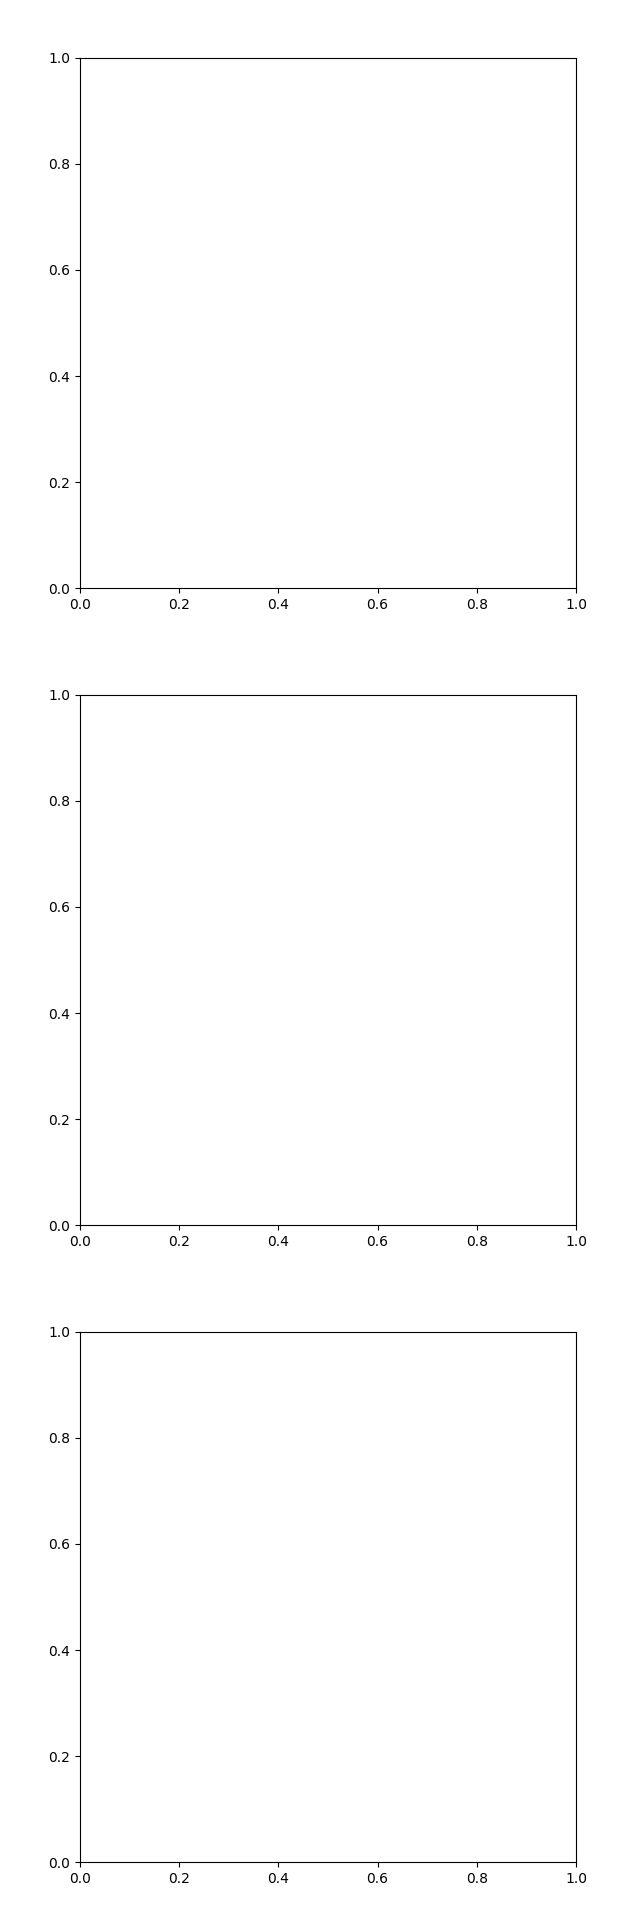

In [126]:
fig, ax = plt.subplots(3)
fig.set_figheight(fig.get_figwidth() * 3)
fig.subplots_adjust(top=0.97, bottom=0.03)
fig_epoch = []
fig_accuracy = []
fig_del = []
fig_cost = []


def init_animate():
    ax[0].plot(fig_epoch, fig_accuracy)
    ax[0].set_title("Accuracy")
    ax[0].set_xlabel("Epoch")
    ax[0].grid()
    ax[1].plot(fig_epoch, fig_del)
    ax[1].set_title("Error")
    ax[1].set_xlabel("Epoch")
    ax[1].grid()
    ax[2].plot(fig_epoch, fig_cost)
    ax[2].set_title("Cost")
    ax[2].set_xlabel("Epoch")
    ax[2].grid()


show_graphs = functools.partial(stochastic_gradient_descent, gradient_descent_matrix)

FuncAnimation(fig, show_graphs, init_func=init_animate, frames=epochs, interval=100, repeat=False)